In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
result = pd.read_csv('../LTC_Data_Test/7_26处理后数据(去重).csv',sep=',')
result.head()

,Unnamed: 0,seq,collcetion_latest_id,base_topic,dst,src,SNR,RSSIpkt,sensor_id,data,data_length,mote_lon,mote_lat,time,distance2base
0,0,0,45,LTC-base1,1,5,8,-98,5,"114.500082,36.571301",20,114.500082,36.571301,2017/7/26 7:59,1202.0
1,1,1,45,LTC-base1,1,5,8,-94,5,"114.500088,36.571312",20,114.500088,36.571312,2017/7/26 7:59,1201.0
2,2,2,45,LTC-base1,1,5,8,-94,5,"114.500092,36.571312",20,114.500092,36.571312,2017/7/26 7:59,1201.0
3,3,4,45,LTC-base1,1,5,8,-93,5,"114.500099,36.571323",20,114.500099,36.571323,2017/7/26 7:59,1200.0
4,4,5,45,LTC-base1,1,5,8,-96,5,"114.500102,36.571331",20,114.500102,36.571331,2017/7/26 7:59,1199.0


In [3]:
result1 = result[result['src']==5]
data1 = result1[result1['seq']>2]
data2 = data1[data1['seq']<46]
data2.count()

Unnamed: 0              39
seq                     39
collcetion_latest_id    39
base_topic              39
dst                     39
src                     39
SNR                     39
RSSIpkt                 39
sensor_id               39
data                    39
data_length             39
mote_lon                39
mote_lat                39
time                    39
distance2base           39
dtype: int64

In [4]:
data2['RSSIpkt'].describe().astype(np.int64).T

count     39
mean     -97
std        3
min     -105
25%     -101
50%      -96
75%      -95
max      -93
Name: RSSIpkt, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x90fdd30>],
 'caps': [<matplotlib.lines.Line2D at 0x9107890>,
 'fliers': [<matplotlib.lines.Line2D at 0x91116f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x9111610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x90fde70>,
  <matplotlib.lines.Line2D at 0x91073d0>]}

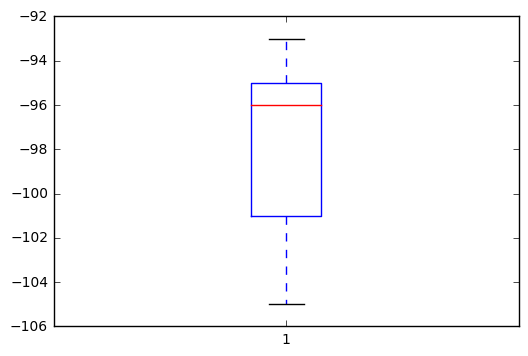

In [5]:
# csvs_3 = csvs[csvs['src']==3]
data3_RSS=data2['RSSIpkt']
snr2 =[]
for i in data3_RSS:
    snr2.append(i)
snr2
plt.boxplot(snr2)
# ax=plt.gca()
# ax.locator_params('x',nbins=10)
# ax.locator_params('y',nbins=20)

In [6]:
q = data2['RSSIpkt'].describe().astype(np.int64).T
q

count     39
mean     -97
std        3
min     -105
25%     -101
50%      -96
75%      -95
max      -93
Name: RSSIpkt, dtype: int64

In [7]:
data2.count()

Unnamed: 0              39
seq                     39
collcetion_latest_id    39
base_topic              39
dst                     39
src                     39
SNR                     39
RSSIpkt                 39
sensor_id               39
data                    39
data_length             39
mote_lon                39
mote_lat                39
time                    39
distance2base           39
dtype: int64

In [8]:
llll = pd.DataFrame(data2,columns=[['RSSIpkt','abnorma']])
llll.count()

RSSIpkt    39
abnorma     0
dtype: int64

In [9]:
l= data2['RSSIpkt'].describe().astype(np.int64).T
Q1 = l[4]
Q3 = l[6]
IQR = Q1-Q3
up_border = Q3 + 1.5*IQR
below_border = Q1 - 1.5*IQR

In [10]:
up_border
below_border

-104.0

In [18]:
for i in data2:
    print(i)

Unnamed: 0
seq
collcetion_latest_id
base_topic
dst
src
SNR
RSSIpkt
sensor_id
data
data_length
mote_lon
mote_lat
time
distance2base


In [12]:
data_index = llll['RSSIpkt']
for i in data_index:
    if i > up_border and i < below_border:
        llll['abnorma'] ='T'
    else:
        llll['abnorma'] ='F'

-93
-96
-94
-95
-95
-96
-102
-103
-102
-103
-102
-101
-102
-105
-103
-103
-101
-96
-97
-97
-97
-97
-97
-96
-96
-101
-96
-96
-97
-95
-94
-94
-95
-95
-94
-93
-95
-95
-95


In [81]:
llll.count()

RSSIpkt    39
abnorma    39
dtype: int64

In [82]:
llll

,RSSIpkt,abnorma
3,-93,T
4,-96,T
5,-94,T
6,-95,T
7,-95,T
8,-96,T
9,-102,T
10,-103,T
11,-102,T
12,-103,T
